In [ ]:
#Installing Face_recognition package
!pip install face-recognition


In [ ]:
#Importing Libraries
from PIL import Image, ImageDraw
import face_recognition
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def calculate_jawline_angle(a,b,c,d):

     dotProduct = a*c + b*d
         # for three dimensional simply add dotProduct = a*c + b*d  + e*f
     modOfVector1 = math.sqrt( a*a + b*b)*math.sqrt(c*c + d*d)
         # for three dimensional simply add modOfVector = math.sqrt( a*a + b*b + e*e)*math.sqrt(c*c + d*d +f*f)
     angle = dotProduct/modOfVector1
    # print("Cosθ =",angle)
     angleInDegree = math.degrees(math.acos(angle))
    # print("θ =",angleInDegree,"°")
     return  angleInDegree


In [ ]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
old_images_dir='/content/drive/MyDrive/datasettt/true'
not_old_images_dir='/content/drive/MyDrive/datasettt/false'


In [ ]:

import math

def detect_jawline_shape(image):

    # Load the jpg file into a numpy array
    image = face_recognition.load_image_file(image)

    # Find all facial features in ll the faces in the image
    face_landmarks_list = face_recognition.face_landmarks(image)  #(0,0) is upper left corner

    if (len(face_landmarks_list))>1:
      print("Sorry, there are too many faces in the image. Only use image of one face.")
    elif (len(face_landmarks_list))==0:
      print("Sorry, no image was detected in the image. Please, try again.")

    #print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))



    #extraction of coordinates
    lists=[]

    for face_landmarks in face_landmarks_list:

        # Print the location of each facial feature in this image
        for facial_feature in face_landmarks.keys():
            if facial_feature == 'chin':
              #print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))
              lists.append(face_landmarks[facial_feature])  #first list is chin, 2nd list is left eyebrow, 3rd is right eyebrow, 4th is nose bridge, 5th is nose tip, 6th is left eye, 7th is right eye, 8th is top lip, 9th is bottom lip
        else:
          break
    chin=[]
    chin.append(lists[0])
    chin=chin[0]
    points=[]
    points=(chin[3],chin[4],chin[6],chin[8],chin[10],chin[9],chin[11],chin[13])
    print(points)

        # Let's trace out each facial feature in the image with a line!
    for i in points:
          cv2.circle(image, i, 5, (0, 0, 255), -1)

    cv2.line(image, chin[3],chin[4] , (0, 255, 0), 2)
    cv2.line(image, chin[4],chin[6] , (0, 255, 0), 2)
    cv2.line(image, chin[6],chin[8] , (255,0 , 0), 2)
    cv2.line(image, chin[8],chin[10] , ( 255,0, 0), 2)
    cv2.line(image,chin[9],chin[11] , (0, 0,255), 2)
    cv2.line(image, chin[11],chin[13] , (0,  0,255), 2)
    """  # Calculate the angle formed by the three landmarks
    angle_ABC1 = math.atan2(chin[13][1] - chin[11][1], chin[13][0] -  chin[11][0]) - math.atan2(chin[9][1] -  chin[11][1], chin[9][0] - chin[11][0])
    angle_ABC2 = math.atan2(chin[10][1] - chin[8][1], chin[10][0] - chin[8][0]) - math.atan2(chin[6][1] - chin[8][1], chin[6][0] - chin[8][0])
    angle_ABC3 = math.atan2(chin[3][1] - chin[4][1], chin[3][0] - chin[4][0]) - math.atan2(chin[6][1] - chin[4][1], chin[6][0] - chin[4][0])

    # Convert the angle from radians to degrees
    angle_ABC_degrees1 = math.degrees(angle_ABC1)
    angle_ABC_degrees2 = math.degrees(angle_ABC2)
    angle_ABC_degrees3 = math.degrees(angle_ABC3)

    # Ensure the angle is in the range of [0, 360)
          # angle_ABC_degrees1 %= 360
          # angle_ABC_degrees2 %= 360
            #angle_ABC_degrees3 %= 360
        print("Angle ABC in degrees1:", angle_ABC_degrees1)
    print("Angle ABC in degrees2:", angle_ABC_degrees2)
    print("Angle ABC in degrees3:", angle_ABC_degrees3)"""


    a= calculate_jawline_angle(chin[13][1] - chin[11][1], chin[13][0] -  chin[11][0],chin[9][1] -  chin[11][1], chin[9][0] - chin[11][0])
    b=calculate_jawline_angle(chin[10][1] - chin[8][1], chin[10][0] - chin[8][0],chin[6][1] - chin[8][1], chin[6][0] - chin[8][0])
    c=calculate_jawline_angle(chin[3][1] - chin[4][1], chin[3][0] - chin[4][0], chin[6][1] - chin[4][1], chin[6][0] - chin[4][0])
    d=calculate_jawline_angle(chin[4][1] - chin[8][1], chin[4][0] - chin[8][0], chin[11][1] - chin[8][1],  chin[11][0] -  chin[8][0])
    return (a,b,c,d)

  #  cv2_imshow( image)
  #  cv2.waitKey(0)




In [ ]:
image= '00257.png'
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

                      """ rotate the image according to the angle of the
                      line linking the eye centers of facial
                      images to adjust the orientation of the images """
left_eye_center, right_eye_center= give_eye_centers(image)
image = rotate(image,right_eye_center,left_eye_center)
image = scale(image,right_eye_center,left_eye_center)
detect_jawline_shape(image)

The chin in this face has the following points: [(146, 461), (148, 547), (157, 631), (178, 714), (217, 788), (275, 850), (344, 898), (417, 938), (487, 951), (553, 937), (608, 890), (661, 838), (703, 777), (726, 707), (743, 633), (754, 558), (754, 484)]
((178, 714), (217, 788), (344, 898), (487, 951), (608, 890), (553, 937), (661, 838), (726, 707))
Cosθ = -0.9329553088568932
θ = 158.9002823501735 °
Cosθ = -0.6808444832593418
θ = 132.9096692400418 °
Cosθ = -0.9316128796183043
θ = 158.6876455562101 °
Cosθ = -0.4364838478764339
θ = 115.87975106638655 °


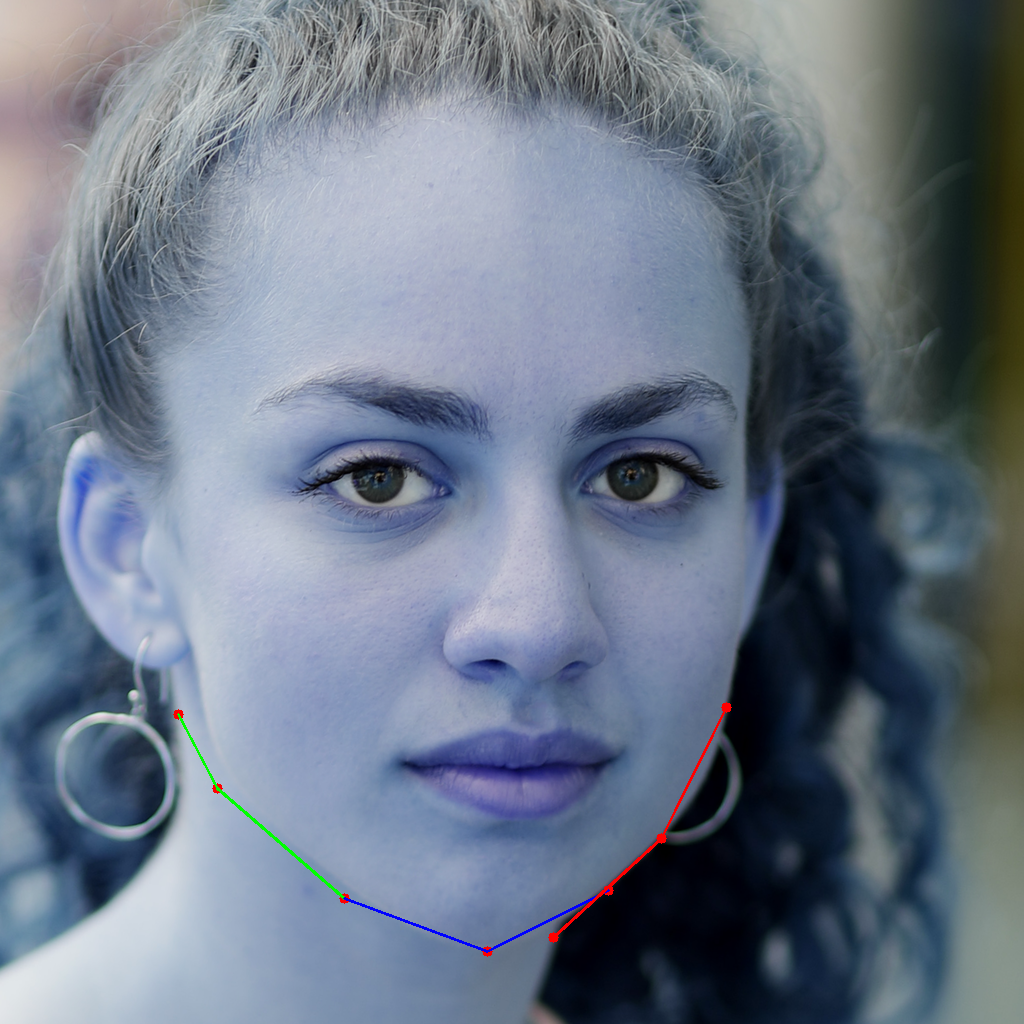

The chin in this face has the following points: [(200, 487), (204, 567), (211, 645), (220, 720), (246, 790), (296, 850), (364, 895), (434, 933), (512, 946), (589, 933), (656, 895), (720, 852), (767, 795), (792, 726), (805, 651), (814, 573), (821, 493)]
((220, 720), (246, 790), (364, 895), (512, 946), (656, 895), (589, 933), (720, 852), (792, 726))
Cosθ = -0.8786024732898053
θ = 151.47423742053857 °
Cosθ = -0.7824329517409805
θ = 141.48387710480802 °
Cosθ = -0.8832759367695593
θ = 152.04009851162306 °
Cosθ = -0.5777224498246004
θ = 125.29051081854422 °


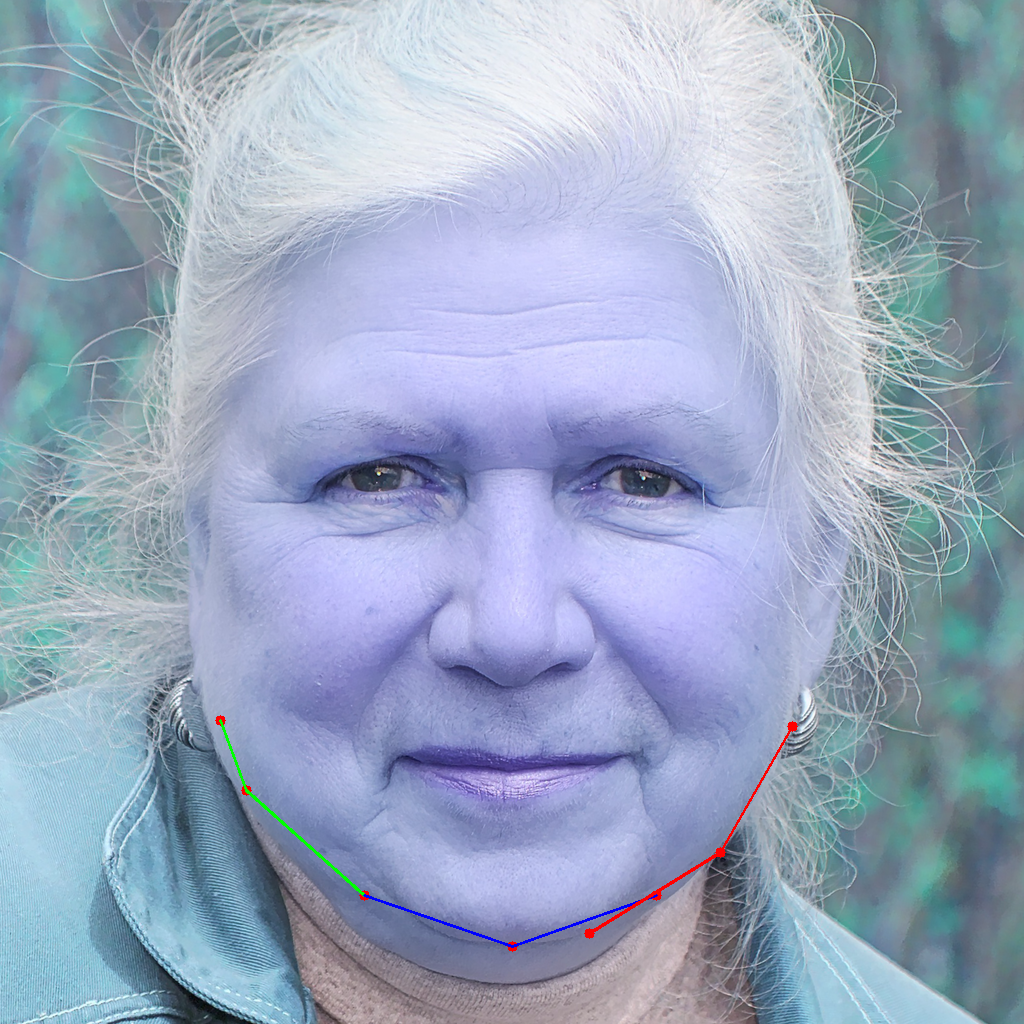

The chin in this face has the following points: [(198, 498), (204, 577), (213, 652), (225, 726), (253, 794), (304, 854), (369, 899), (441, 935), (525, 943), (605, 930), (667, 889), (722, 841), (764, 783), (787, 716), (793, 644), (796, 574), (799, 501)]
((225, 726), (253, 794), (369, 899), (525, 943), (667, 889), (605, 930), (722, 841), (787, 716))
Cosθ = -0.9043366636566749
θ = 154.73409046743924 °
Cosθ = -0.8031080580310445
θ = 143.42793348323616 °
Cosθ = -0.902815533012944
θ = 154.53066049128236 °
Cosθ = -0.5579294219759452
θ = 123.91272408263013 °


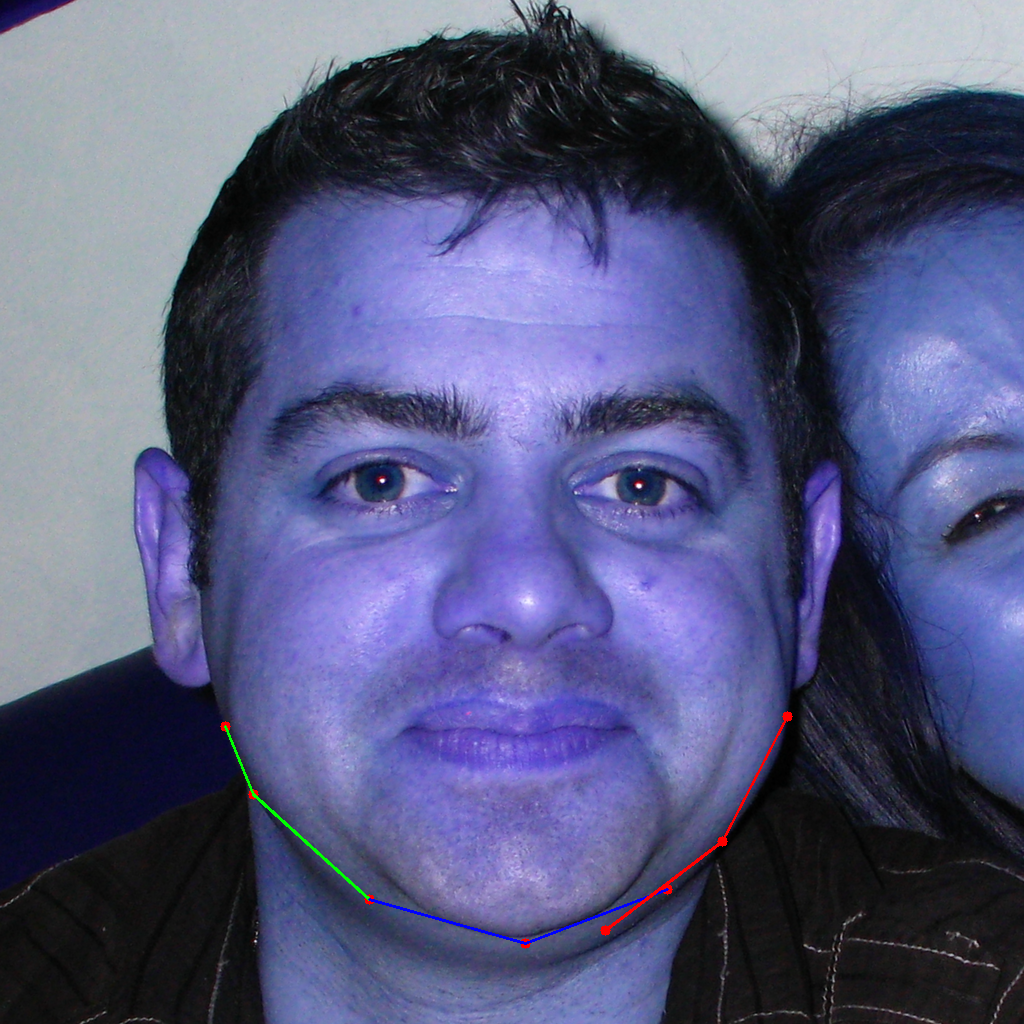

The chin in this face has the following points: [(229, 529), (226, 596), (235, 667), (251, 733), (280, 797), (323, 852), (378, 896), (440, 931), (510, 943), (577, 930), (633, 889), (686, 842), (727, 789), (755, 726), (768, 660), (769, 590), (758, 523)]
((251, 733), (280, 797), (378, 896), (510, 943), (633, 889), (577, 930), (686, 842), (755, 726))
Cosθ = -0.9376504753829203
θ = 159.6606554165046 °
Cosθ = -0.7277553141419159
θ = 136.69854272444775 °
Cosθ = -0.9376908241631676
θ = 159.6673076390253 °
Cosθ = -0.4655123139545968
θ = 117.74338316657132 °


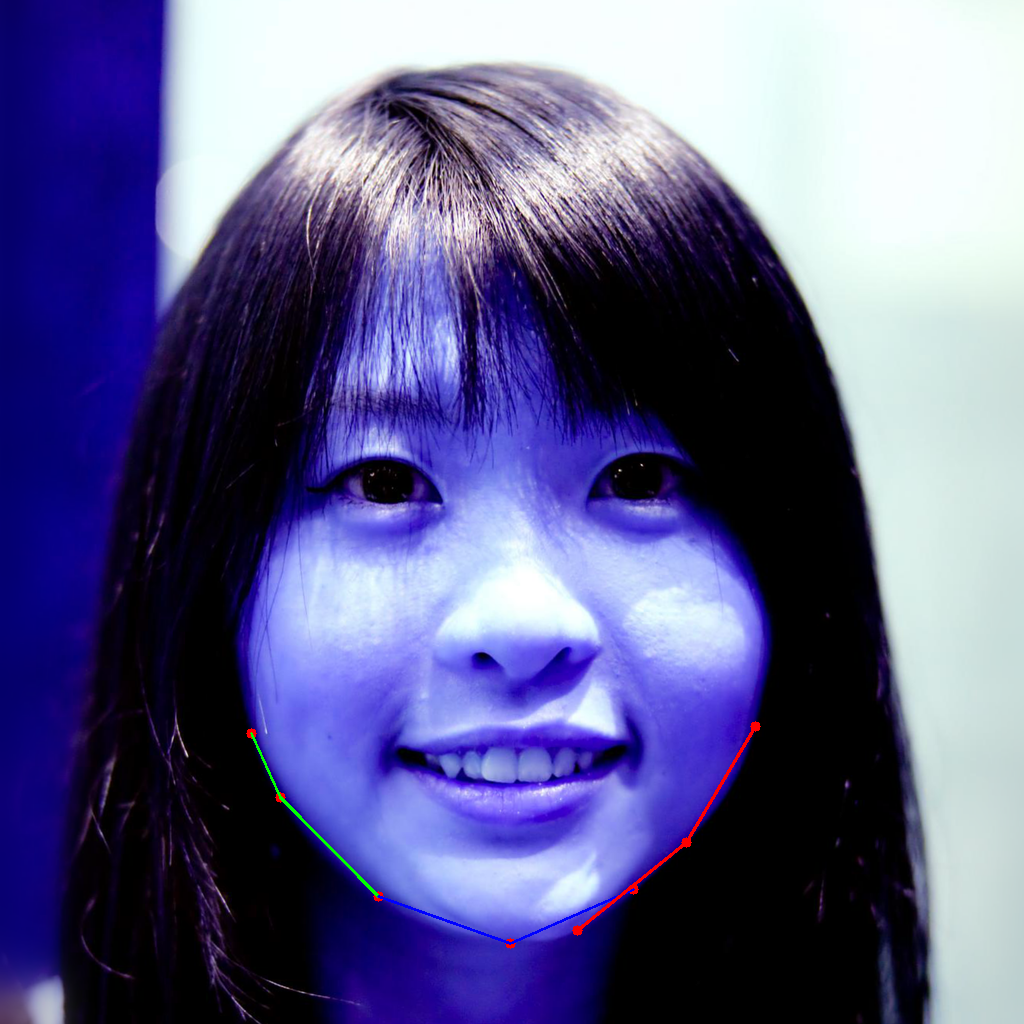

"image= '00072.png'\ndetect_jawline_shape(image)"

In [ ]:
# Example usage

image_path=  '00128.png'

detect_jawline_shape(image_path)
image= '00257.png'
detect_jawline_shape(image)

image= '00016.png'
detect_jawline_shape(image)
image= '00055.png'
detect_jawline_shape(image)
"""image= '00072.png'
detect_jawline_shape(image)"""

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from skimage.feature import local_binary_pattern
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import os

In [ ]:
!pip install MediaPipe

In [ ]:
def load_images(path):

    images = []
    filenames = os.listdir(path)

    for filename in tqdm(filenames[:-1]):
        image = cv2.imread(os.path.join(path, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

    return np.array(images)
import mediapipe as mp
def give_eye_centers(img):

 # Load the MediaPipe FaceMesh solution
 mp_face_mesh = mp.solutions.face_mesh
 face_mesh = mp_face_mesh.FaceMesh()



 # Process the image with FaceMesh
 results = face_mesh.process((cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

 # Extract the eye centers
 if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Define the landmark indices for the left and right eye
        left_eye_landmark_indices = [33, 133, 143, 153, 159, 145]
        right_eye_landmark_indices = [362, 263, 373, 380, 374, 386]

        # Initialize the eye center coordinates
        left_eye_center = [0, 0]
        right_eye_center = [0, 0]

        # Extract the eye center coordinates
        for index in left_eye_landmark_indices:
            landmark = face_landmarks.landmark[index]
            x = int(landmark.x * img.shape[1])
            y = int(landmark.y * img.shape[0])
            left_eye_center[0] += x
            left_eye_center[1] += y

        for index in right_eye_landmark_indices:
            landmark = face_landmarks.landmark[index]
            x = int(landmark.x * img.shape[1])
            y = int(landmark.y * img.shape[0])
            right_eye_center[0] += x
            right_eye_center[1] += y

        # Calculate the average eye center coordinates
        left_eye_center[0] //= len(left_eye_landmark_indices)
        left_eye_center[1] //= len(left_eye_landmark_indices)
        right_eye_center[0] //= len(right_eye_landmark_indices)
        right_eye_center[1] //= len(right_eye_landmark_indices)
        return  (left_eye_center, right_eye_center)



import math
def rotate(img,right_eye_center,left_eye_center):

 # Eye centers coordinates


 eye_center1 = ( left_eye_center[0], left_eye_center[1])  # Coordinates of first eye center
 eye_center2 = ( right_eye_center[0], right_eye_center[1])  # Coordinates of second eye center



 # Calculate the angle of the line linking the eye centers
 angle = math.degrees(math.atan2(right_eye_center[1] -  left_eye_center[1],  right_eye_center[0] - left_eye_center[0]))

 # Rotate the image
 rows, cols = img.shape[:2]
 rotation_matrix = cv2.getRotationMatrix2D(eye_center1, angle, 1.0)
 rotated_image = cv2.warpAffine(img, rotation_matrix, (cols, rows), flags=cv2.INTER_LINEAR)

 return (np.array(rotated_image))

def scale(image,right_eye_center,left_eye_center):

 # Calculate the current distance between the eye centers
 current_eye_distance = math.sqrt((right_eye_center[1] -  left_eye_center[1]) ** 2 + (right_eye_center[0] - left_eye_center[0]) ** 2)
 # Define the desired eye distance (e.g., 50 pixels)
 desired_eye_distance = 50

 # Calculate the scaling factor
 scaling_factor = desired_eye_distance / current_eye_distance

 # Scale the image using the scaling factor
 scaled_image = cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor)

 return ( np.array(scaled_image))



def preprocess_images(images):
    preprocessed_images = []
    for image in tqdm(images):

        # Convert the image to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        """ rotate the image according to the angle of the
        line linking the eye centers of facial
        images to adjust the orientation of the images """
        left_eye_center, right_eye_center= give_eye_centers(image)
        image = rotate(image,right_eye_center,left_eye_center)
        image = scale(image,right_eye_center,left_eye_center)
        #image = crop(image)
        preprocessed_images.append(image)

    return np.array(preprocessed_images)




In [ ]:
main_dir = "/content/drive/MyDrive/datasettt/"

classnames = ['true', 'false']
# Load the image
class_0 = load_images(main_dir+classnames[0])
class_1 = load_images(main_dir+classnames[1])
old_images_dir = preprocess_images(class_0)
not_old_images_dir = preprocess_images(class_1)

In [ ]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns



# Lists to store the data
data = []
categories = []


for image in old_images_dir:

    jawline_angles = detect_jawline_shape(image)
    data.append(jawline_angles)  # Assuming calculate_jawline_angle returns a list of angles
    categories.append('old')

# Process images from the "not old" category
for filename in os.listdir(not_old_images_dir):
    image_path = os.path.join(main_dir+classnames[1], filename)
    jawline_angles = detect_jawline_shape(image_path)
    data.append(jawline_angles)  # Assuming calculate_jawline_angle returns a list of angles
    categories.append('not_old')

# Create the DataFrame
df = pd.DataFrame(data, columns=['Jawline_Angle1', 'Jawline_Angle2', 'Jawline_Angle3', 'Jawline_Angle4'])
df['Category'] = categories

# Display the DataFrame
print(df.head())




In [ ]:
# Plot histograms
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Jawline_Angle1', hue='Category', kde=True, label='old/not_old')
plt.xlabel('Jawline Angle 1')
plt.title('Distribution of Jawline Angle 1')
plt.legend(title='Age Category')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Jawline_Angle2', hue='Category', kde=True)
plt.xlabel('Jawline Angle 2')
plt.title('Distribution of Jawline Angle 2')
plt.legend(title='Age Category')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Jawline_Angle3', hue='Category', kde=True)
plt.xlabel('Jawline Angle 3')
plt.title('Distribution of Jawline Angle 3')
plt.legend(title='Age Category')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Jawline_Angle4', hue='Category', kde=True)
plt.xlabel('Jawline Angle 4')
plt.title('Distribution of Jawline Angle 4')
plt.legend(title='Age Category')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming you already have the DataFrame 'df' containing jawline angles and age categories

# Group the data by the 'Category' column
grouped_data = df.groupby('Category')

# Calculate descriptive statistics for each age category
statistics = grouped_data.agg({
    'Jawline_Angle1': ['mean', 'median', 'std', 'min', 'max'],
    'Jawline_Angle2': ['mean', 'median', 'std', 'min', 'max'],
    'Jawline_Angle3': ['mean', 'median', 'std', 'min', 'max'],
    'Jawline_Angle4': ['mean', 'median', 'std', 'min', 'max']
})

# Rename the columns for clarity
statistics.columns = ['Angle1_Mean', 'Angle1_Median', 'Angle1_Std', 'Angle1_Min', 'Angle1_Max',
                      'Angle2_Mean', 'Angle2_Median', 'Angle2_Std', 'Angle2_Min', 'Angle2_Max',
                      'Angle3_Mean', 'Angle3_Median', 'Angle3_Std', 'Angle3_Min', 'Angle3_Max',
                      'Angle4_Mean', 'Angle4_Median', 'Angle4_Std', 'Angle4_Min', 'Angle4_Max']

# Display the statistics
print(statistics)


          Angle1_Mean  Angle1_Median  Angle1_Std  Angle1_Min  Angle1_Max  \
Category                                                                   
not_old    159.183107     158.614231    7.715856  141.577248  178.082638   
old        155.304976     154.701721    7.636305  135.208371  176.607910   

          Angle2_Mean  Angle2_Median  Angle2_Std  Angle2_Min  Angle2_Max  \
Category                                                                   
not_old    134.518219     134.185229    7.961711  118.057193  156.779654   
old        137.041091     137.658733    8.872137  115.055256  160.792218   

          Angle3_Mean  Angle3_Median  Angle3_Std  Angle3_Min  Angle3_Max  \
Category                                                                   
not_old    159.622400     158.756039    7.210187  145.975625  176.920583   
old        160.609701     158.969721    7.213910  143.885765  179.040910   

          Angle4_Mean  Angle4_Median  Angle4_Std  Angle4_Min  Angle4_Max  
Category  

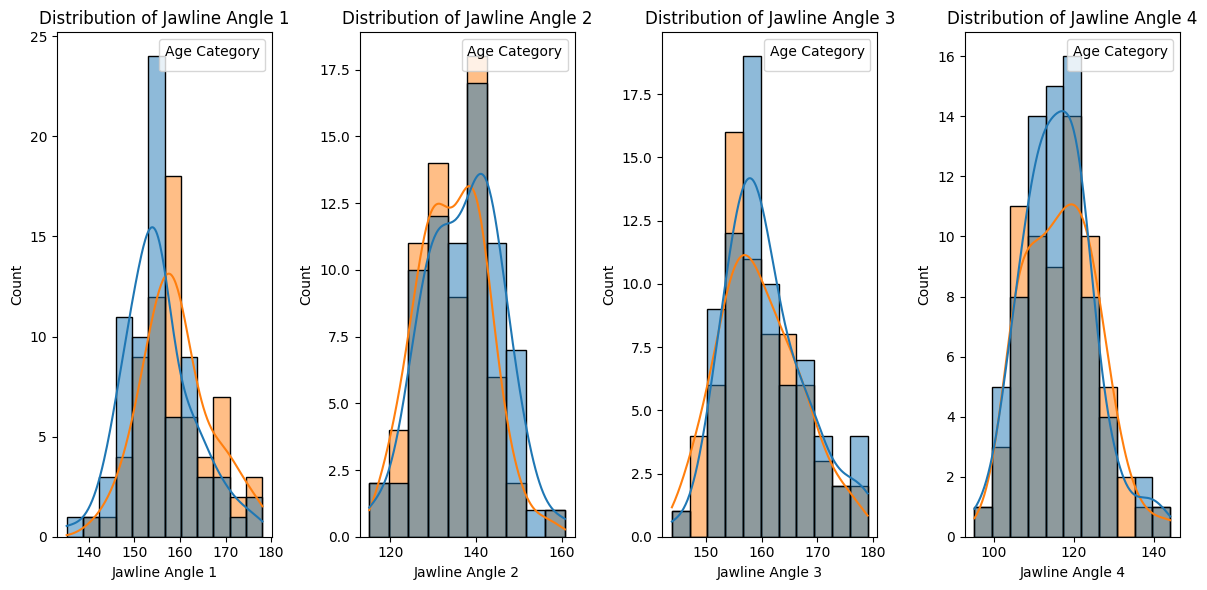

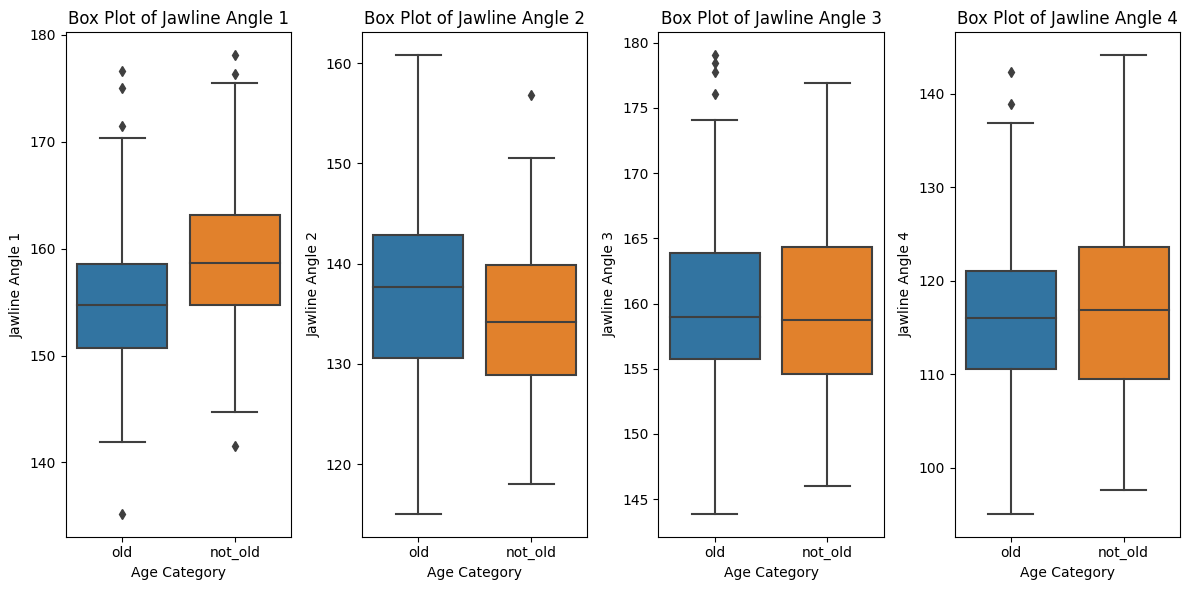

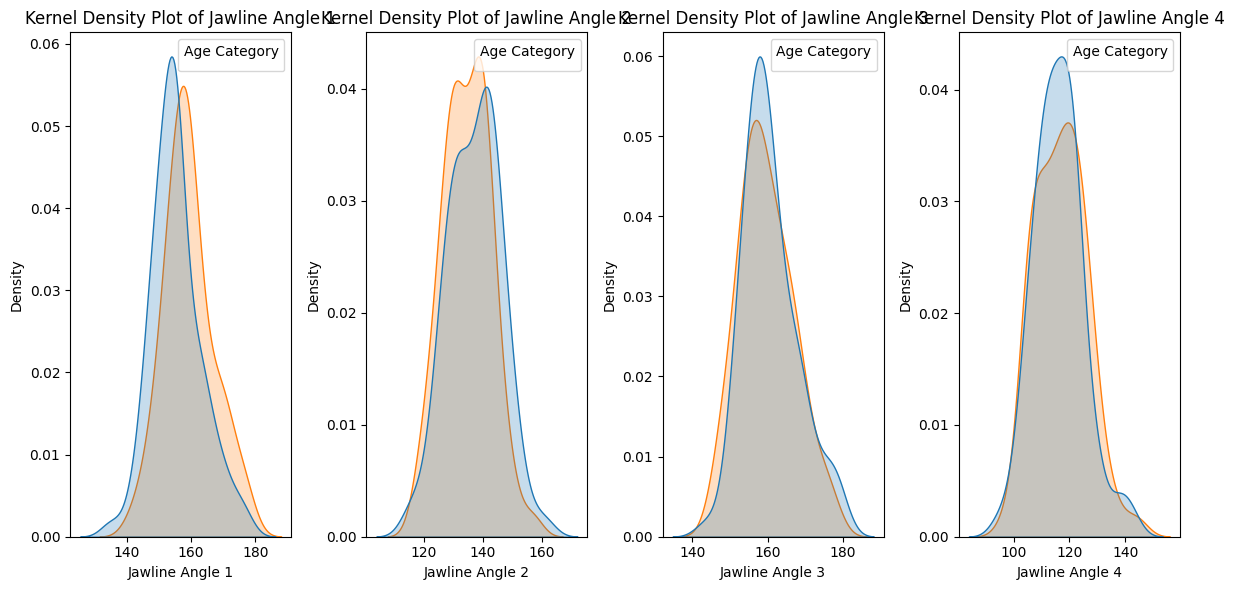

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame 'df' containing jawline angles and age categories

# Plot histograms
plt.figure(figsize=(12, 6))
for i in range(4):  # Assuming you have 4 jawline angles
    plt.subplot(1, 4, i+1)
    sns.histplot(data=df, x=f'Jawline_Angle{i+1}', hue='Category', kde=True, hue_order=['old', 'not_old'])
    plt.xlabel(f'Jawline Angle {i+1}')
    plt.title(f'Distribution of Jawline Angle {i+1}')
    plt.legend(title='Age Category')
plt.tight_layout()
plt.show()

# Create box plots
plt.figure(figsize=(12, 6))

for i in range(4):
    plt.subplot(1, 4, i+1)
    sns.boxplot(data=df, x='Category', y=f'Jawline_Angle{i+1}')
    plt.xlabel('Age Category')
    plt.ylabel(f'Jawline Angle {i+1}')
    plt.title(f'Box Plot of Jawline Angle {i+1}')
plt.tight_layout()
plt.show()

# Kernel density plots
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    sns.kdeplot(data=df, x=f'Jawline_Angle{i+1}', hue='Category', fill=True, common_norm=False)
    plt.xlabel(f'Jawline Angle {i+1}')
    plt.title(f'Kernel Density Plot of Jawline Angle {i+1}')
    plt.legend(title='Age Category')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the DataFrame 'df' containing jawline angles and age categories

# Set the color palette for the age categories
sns.set_palette(['blue', 'orange'])

# Violin plot
plt.figure(figsize=(12, 6))
for i in range(4):  # Assuming you have 4 jawline angles
    plt.subplot(1, 4, i+1)
    sns.violinplot(data=df, x='Category', y=f'Jawline_Angle{i+1}', palette=['blue', 'orange'])
    plt.xlabel('Age Category')
    plt.ylabel(f'Jawline Angle {i+1}')
    plt.title(f'Violin Plot of Jawline Angle {i+1}')
plt.tight_layout()
plt.show()

# Swarm plot
plt.figure(figsize=(12, 6))
for i in range(4):  # Assuming you have 4 jawline angles
    plt.subplot(1, 4, i+1)
    sns.swarmplot(data=df, x='Category', y=f'Jawline_Angle{i+1}', palette=['blue', 'orange'])
    plt.xlabel('Age Category')
    plt.ylabel(f'Jawline Angle {i+1}')
    plt.title(f'Swarm Plot of Jawline Angle {i+1}')
plt.tight_layout()
plt.show()